In [155]:
import pandas as pd # import pandas library

column_dtypes = {
    # "config:run_mode": "string",  
    # "config:monitor": "string",
    # "config:experiment": "string",  
    # "config:special": "string",  
    # "benchmark:suite": "string",  
    # "benchmark:name": "string",  
    # "run_errored": "bool",  
    "run_time:mean": "float64",  
    "run_time:user": "float64",  
    "run_time:system": "float64",  
    "wiz_metrics_pregen:time_us": "float64",  
    "wiz_metrics_pregen:bytes": "float64",  
    "wiz_metrics_load:time_us": "float64",  
    "wiz_metrics_load:bytes": "float64",  
    "wiz_metrics_load:time_per_byte": "float64",  
    "wiz_metrics_validate:time_us": "float64",  
    "wiz_metrics_validate:bytes": "float64",  
    "wiz_metrics_validate:time_per_byte": "float64",  
    "wiz_metrics_spc:in_bytes": "float64",  
    "wiz_metrics_spc:code_bytes": "float64",  
    "wiz_metrics_spc:data_bytes": "float64",  
    "wiz_metrics_spc:time_us": "float64",  
    "wiz_metrics_spc:functions": "float64",  
    "wiz_metrics_spc:time_per_byte": "float64",  
    "wiz_metrics_start:time_us": "float64",  
    "wiz_metrics_main:time_us": "float64",  
    "wiz_metrics_main:time_cycles": "float64",  
    "wiz_metrics_probes:fired": "float64",  
    "wiz_metrics_whamm:bind_time_us": "float64",  
    "wiz_metrics_whamm:report_time_us": "float64",  
    "run_cmd": "string",  
    # "run_timed_out": "bool"
}
# df_r3 = pd.read_csv('RERUN-opts_r3.csv', low_memory=False, dtype=column_dtypes)
df_polybench = pd.read_csv('RERUN-opts_polybench.csv', low_memory=False, dtype=column_dtypes)

In [156]:
df = df_polybench

In [157]:
df = pd.concat([df_polybench])

In [158]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [159]:
print(df)

      Unnamed: 0  run_errored config:run_mode               config:monitor config:experiment config:special benchmark:suite       benchmark:name  run_time:mean  wiz_metrics_main:time_us  wiz_metrics_whamm:bind_time_us  wiz_metrics_whamm:report_time_us                                            run_cmd run_timed_out
0             14        False   jit-tramp-jit                     branches      whamm_engine            NaN       polybench            bicg.wasm   1.362790e-01              4.926200e+04                    1.540600e+03                      2.330460e+04  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
1             15        False   jit-tramp-jit                     branches      whamm_engine    calc-bundle       polybench            bicg.wasm   1.334793e-01              4.719340e+04                    1.576800e+03                      2.305900e+04  /home/evgilber/git/papers/oopsla2025-whamm/eva...           NaN
2             36        False   jit-tramp-jit    

In [160]:
# Check that there were no errors in the data set
errored = df[df['run_errored'] == True]
assert errored.empty, 'We had some errors!'

In [161]:
# SUITE = 'r3'
WHAMM_ENGINE = 'whamm_engine'
WHAMM_REWRITE = 'whamm_rewrite'
# RUNTIME_MEASUREMENT = 'run_time:mean'
RUNTIME_MEASUREMENT = 'wiz_metrics_main:time_us'
REPORT_MEASUREMENT = 'wiz_metrics_whamm:report_time_us'


# Baseline int data
baseline_polybench_int_df = df[(df['config:run_mode'] == 'base_int') & (df['benchmark:suite'] == 'polybench')]
baseline_r3_int_df = df[(df['config:run_mode'] == 'base_int') & (df['benchmark:suite'] == 'r3')]
# print(baseline_polybench_int_df)

def get_monitor_df(mon):
    # Monitor data, polybench data!
    
    new_df_rows = []
    for SUITE in ["polybench"]:
        monitor_polybench_df = df[(df['config:monitor'] == mon) & (df['benchmark:suite'] == SUITE) & (df['config:special'].isna())]
        
        for benchmark_name in monitor_polybench_df['benchmark:name'].unique():
            # baseline_data = baseline_polybench_int_df[baseline_polybench_int_df['benchmark:name'] == benchmark_name]
            # assert len(baseline_data) == 1, f"found multiple baselines for interpreter, {mon} monitor: {len(baseline_data)}"
            if SUITE == 'polybench':
                baseline_data = baseline_polybench_int_df[baseline_polybench_int_df['benchmark:name'] == benchmark_name]
            else:
                baseline_data = baseline_r3_int_df[baseline_r3_int_df['benchmark:name'] == benchmark_name]
            base_int = baseline_data[RUNTIME_MEASUREMENT].values[0]
            
            engine_data = monitor_polybench_df[(monitor_polybench_df['config:experiment'] == WHAMM_ENGINE) & (monitor_polybench_df['benchmark:name'] == benchmark_name)]
            # assert len(engine_data) == 11, f"found wrong number of results, expected 11: {len(engine_data)}"
            # Pull each run config
            
            int_rt_int = engine_data[engine_data['config:run_mode'] == 'int-rt-int'][RUNTIME_MEASUREMENT].values[0]
            int_rt_int_report = engine_data[engine_data['config:run_mode'] == 'int-rt-int'][REPORT_MEASUREMENT].values[0]
            # print(int_rt_int_report)
            
            int_rt_jit = engine_data[engine_data['config:run_mode'] == 'int-rt-jit'][RUNTIME_MEASUREMENT].values[0]
            int_rt_jit_report = engine_data[engine_data['config:run_mode'] == 'int-rt-jit'][REPORT_MEASUREMENT].values[0]
            # print(int_rt_jit_report)
            
            int_tramp_int = engine_data[engine_data['config:run_mode'] == 'int-tramp-int'][RUNTIME_MEASUREMENT].values[0]
            int_tramp_int_report = engine_data[engine_data['config:run_mode'] == 'int-tramp-int'][REPORT_MEASUREMENT].values[0]
            # print(int_tramp_int_report)
            
            int_tramp_jit = engine_data[engine_data['config:run_mode'] == 'int-tramp-jit'][RUNTIME_MEASUREMENT].values[0]
            int_tramp_jit_report = engine_data[engine_data['config:run_mode'] == 'int-tramp-jit'][REPORT_MEASUREMENT].values[0]
            
            rewriting_df = df[(df['config:monitor'] == mon) & (df['benchmark:suite'] == SUITE)]
            rewriting_data = rewriting_df[(rewriting_df['config:experiment'] == WHAMM_REWRITE) & (rewriting_df['benchmark:name'] == benchmark_name) & (rewriting_df['config:special'] == 'calc_report')]
            # assert len(rewriting_data) == 2, f"found wrong number of results, expected 2: {len(rewriting_data)}"
            try:
                rewrite_int = rewriting_data[rewriting_data['config:run_mode'] == 'int-default'][RUNTIME_MEASUREMENT].values[0]
            except:
                # print("continued")
                # continue
                rewrite_int = 6e8
            # print(rewriting_data[rewriting_data['config:run_mode'] == 'int-default'])
                
            # (Calculate relative overhead here)
            new_df_rows.append({
                'suite': SUITE,
                'benchmark': benchmark_name,
                'time-int': base_int,
                '$\\it{wei}$, int-rt-int': (int_rt_int) / base_int,
                '$\\it{wei}$, int-rt-jit': (int_rt_jit) / base_int,
                '$\\it{wei}$, int-tramp-int': (int_tramp_int) / base_int,
                '$\\it{wei}$, int-tramp-jit': (int_tramp_jit) / base_int,
                'Whamm rewriting, int': (rewrite_int) / base_int,
            })
        
    return pd.DataFrame(new_df_rows)


branches_df = get_monitor_df('branches')
hotness_df = get_monitor_df('hotness')
icount_df = get_monitor_df('icount')
imix_df = get_monitor_df('imix')
cache_df = get_monitor_df('cache-sim')
mem_access_df = get_monitor_df('mem-access')
loop_tracer_df = get_monitor_df('loop-tracer')
basic_blocks_df = get_monitor_df('basic-blocks')
instr_coverage_df = get_monitor_df('instr-coverage')
call_graph_df = get_monitor_df('call-graph')

In [162]:
branches_df

,suite,benchmark,time-int,"$\it{wei}$, int-rt-int","$\it{wei}$, int-rt-jit","$\it{wei}$, int-tramp-int","$\it{wei}$, int-tramp-jit","Whamm rewriting, int"
0,polybench,bicg.wasm,22522.8,3.579182,3.429831,1.147158,0.837995,26639.671799
1,polybench,symm.wasm,308711.6,5.416234,5.071464,1.741218,1.217876,1943.561564
2,polybench,gramschmidt.wasm,468984.6,2.770442,2.661918,1.336308,1.136200,1279.359706
3,polybench,floyd-warshall.wasm,5974126.4,3.852221,3.664619,1.536787,1.205129,100.433094
4,polybench,2mm.wasm,487320.8,4.657836,4.411563,1.676952,1.282091,1231.221815
5,polybench,fdtd-2d.wasm,829638.0,3.432848,3.304201,1.442273,1.172070,723.206989
6,polybench,durbin.wasm,14526.4,2.612154,2.499174,0.844394,0.629103,41304.108382
7,polybench,syrk.wasm,260914.0,4.184905,3.941295,1.527620,1.197792,2299.608300
8,polybench,correlation.wasm,291651.6,4.629657,4.462636,1.610411,1.195931,2057.249129
9,polybench,ludcmp.wasm,3087656.4,4.429743,4.239938,1.598519,1.291504,194.322140


In [163]:
instr_coverage_df[instr_coverage_df['suite'] == 'polybench'].sort_values('time-int')

,suite,benchmark,time-int,"$\it{wei}$, int-rt-int","$\it{wei}$, int-rt-jit","$\it{wei}$, int-tramp-int","$\it{wei}$, int-tramp-jit","Whamm rewriting, int"
11,polybench,jacobi-1d.wasm,7495.0,169.328566,120.292302,26.401761,12.254516,80053.368913
24,polybench,trisolv.wasm,13981.6,169.571651,195.835727,37.015277,17.230617,42913.543514
6,polybench,durbin.wasm,14526.4,181.847891,164.925405,27.549427,13.726732,41304.108382
18,polybench,gesummv.wasm,16669.0,225.820733,239.515880,27.380983,25.226612,35994.960706
0,polybench,bicg.wasm,22522.8,176.424334,159.637621,20.769247,12.288499,26639.671799
17,polybench,atax.wasm,25438.6,269.674259,243.352095,54.935610,24.702987,23586.203643
10,polybench,mvt.wasm,26082.6,258.875480,200.782046,44.735042,19.366398,23003.841642
21,polybench,gemver.wasm,32697.8,432.107787,399.409979,62.320627,31.920050,18349.858400
13,polybench,trmm.wasm,180057.8,345.472898,417.821733,50.291852,34.136794,3332.263307
12,polybench,doitgen.wasm,214696.0,432.529940,425.147795,48.411387,25.527131,2794.649178


In [164]:
branches_df[branches_df['suite'] == 'polybench'].sort_values('time-int')

,suite,benchmark,time-int,"$\it{wei}$, int-rt-int","$\it{wei}$, int-rt-jit","$\it{wei}$, int-tramp-int","$\it{wei}$, int-tramp-jit","Whamm rewriting, int"
11,polybench,jacobi-1d.wasm,7495.0,1.799680,1.739613,0.605577,0.458039,80053.368913
24,polybench,trisolv.wasm,13981.6,2.054715,1.999485,0.770341,0.593695,42913.543514
6,polybench,durbin.wasm,14526.4,2.612154,2.499174,0.844394,0.629103,41304.108382
18,polybench,gesummv.wasm,16669.0,2.571744,2.452973,0.848053,0.628496,35994.960706
0,polybench,bicg.wasm,22522.8,3.579182,3.429831,1.147158,0.837995,26639.671799
17,polybench,atax.wasm,25438.6,2.426769,2.337055,1.003915,0.827113,23586.203643
10,polybench,mvt.wasm,26082.6,3.350180,3.112312,1.103870,0.855306,23003.841642
21,polybench,gemver.wasm,32697.8,3.520904,3.370863,1.338439,0.951838,18349.858400
13,polybench,trmm.wasm,180057.8,4.680071,4.487650,1.585926,1.221533,3332.263307
12,polybench,doitgen.wasm,214696.0,4.253091,4.244874,1.648708,1.170015,2794.649178


In [165]:
len(branches_df.groupby("benchmark"))

29

In [166]:
def group(x):

    if x["suite"] == "polybench":
        if x["time-int"] < 250_000:
            return 1
        elif x["time-int"] < 800_000:
            return 2
        else:
            return 3
    else:
        if x["time-int"] < 10_000:
            return 4
        if x["time-int"] < 1.7e6:
            return 5
        return 6

def make_thirds(all_df):
    all_df['group'] = all_df.apply(group, axis=1)
    all_df = all_df.rename(columns = {
        '$\\it{wei}$, int-rt-int': '$\\it{wei}$, int-rt-int',
        '$\\it{wei}$, int-rt-jit': '$\\it{wei}$, int-rt-jit',
        '$\\it{wei}$, int-tramp-int': '$\\it{wei}$, int-tramp-int',
        '$\\it{wei}$, int-tramp-jit': '$\\it{wei}$, int-tramp-jit',
        'Whamm rewriting, int': 'Whamm rewriting, int'
    })
    return all_df
    # all_df['group'] = all_df.apply(group, axis=1)
    # mean = pd.DataFrame({
    #     "benchmark": group,
    #     "time-int": df['time-int'].mean(),
    #     "count": len(df),
    #     "$\omega$, int-rt-int": df['$\\it{whamm}$, int-rt-int'].mean(),
    #     "$\omega$, int-rt-jit": df['$\\it{whamm}$, int-rt-jit'].mean(),
    #     "$\omega$, int-tramp-int": df['$\\it{whamm}$, int-tramp-int'].mean(),
    #     "$\omega$, int-tramp-jit": df['$\\it{whamm}$, int-tramp-jit'].mean(),
    #     "$\Omega$ rewriting, int": df['Whamm rewriting, int'].mean(),
    # } for group, df in all_df.groupby("group"))
    # mins = pd.DataFrame({
    #     "$\omega$, int-rt-int": df['$\\it{whamm}$, int-rt-int'].min(),
    #     "$\omega$, int-rt-jit": df['$\\it{whamm}$, int-rt-jit'].min(),
    #     "$\omega$, int-tramp-int": df['$\\it{whamm}$, int-tramp-int'].min(),
    #     "$\omega$, int-tramp-jit": df['$\\it{whamm}$, int-tramp-jit'].min(),
    #     "$\Omega$ rewriting, int": df['Whamm rewriting, int'].min(),
    # } for group, df in all_df.groupby("group"))
    # maxs = pd.DataFrame({
    #     "$\omega$, int-rt-int": df['$\\it{whamm}$, int-rt-int'].max(),
    #     "$\omega$, int-rt-jit": df['$\\it{whamm}$, int-rt-jit'].max(),
    #     "$\omega$, int-tramp-int": df['$\\it{whamm}$, int-tramp-int'].max(),
    #     "$\omega$, int-tramp-jit": df['$\\it{whamm}$, int-tramp-jit'].max(),
    #     "$\Omega$ rewriting, int": df['Whamm rewriting, int'].max(),
    # } for group, df in all_df.groupby("group"))
    # return mean, mins, maxs

branches_df_thirds = make_thirds(branches_df)
hotness_df_thirds = make_thirds(hotness_df)
icount_df_thirds = make_thirds(icount_df)
imix_df_thirds = make_thirds(imix_df)
cache_df_thirds = make_thirds(cache_df)
mem_access_df_thirds = make_thirds(mem_access_df)
loop_tracer_df_thirds = make_thirds(loop_tracer_df)
basic_blocks_df_thirds = make_thirds(basic_blocks_df)
instr_coverage_df_thirds = make_thirds(instr_coverage_df)
call_graph_df_thirds = make_thirds(call_graph_df)


In [167]:
branches_df_thirds.groupby("group").count()
# print(branches_df_thirds)
print(branches_df_thirds[branches_df_thirds["group"] == 1]['$\\it{wei}$, int-rt-int'])

groups = branches_df_thirds["group"].unique()
print(len(groups))
print(len([branches_df_thirds[branches_df_thirds["group"] == group]['$\\it{wei}$, int-rt-int'] for group in groups]))

print(range(1, len(groups)))

0     3.579182
6     2.612154
10    3.350180
11    1.799680
12    4.253091
13    4.680071
17    2.426769
18    2.571744
21    3.520904
24    2.054715
Name: $\it{wei}$, int-rt-int, dtype: float64
3
3
range(1, 3)


In [193]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def plot_df_grouped(configs):
    num = len(configs)
    fig, axs = plt.subplots(num, 1, figsize=(8, 2.2 * num))
    for i, config in enumerate(configs):
        ax = axs[i]
        df, ylim, mon_name, include_benchmarks_label = config
        
        to_plot = ['$\\it{wei}$, int-rt-int', '$\\it{wei}$, int-rt-jit', '$\\it{wei}$, int-tramp-int', '$\\it{wei}$, int-tramp-jit']
        colors = ['firebrick', 'sandybrown', 'mediumseagreen', 'royalblue']
        
        # df = dfs[0]
    
        # Sort the DataFrame by 'time-jit' in increasing order
        # df_sorted = df.sort_values('time-int')
        # df_sorted = df.reindex([2, 5, 1, 4, 0, 3])
        # Reset the index to ensure the first entry is properly handled
        # df_sorted.reset_index(drop=True, inplace=True)

        # df_sorted[to_plot].plot(kind='bar', zorder=3, ax=ax, color=colors)
    
        # Setting y-axis to logarithmic scale (base 10)
        ax.set_yscale('log')
        ax.set_ylim(1, ylim)
        
        # df = df[["group"] + to_plot]
        # gp = df.groupby(by="group", sort=True)
    
        # means = gp.mean()
        # mins = gp.min()
        # maxs = gp.max()
        # print("----")
        # print("Monitor:", mon_name)
        # print("df['$\\it{wei}$, int-rt-int']:", df['$\\it{wei}$, int-rt-int'])
        # print("Mins:")
        # print(mins)
        # print("Maxs:")
        # print(maxs)

        groups = df["group"].unique()

        offsets = np.linspace(-0.3, 0.3, len(to_plot))

        for j, group in enumerate(groups):
            for k, item in enumerate(to_plot):
                values = df[df["group"] == group][item]
                pos = j + offsets[k]
                parts = ax.violinplot(values, positions=[pos], widths=0.25, showmeans=True)

                # Color the violin body
                for pc in parts['bodies']:
                    pc.set_facecolor(colors[k])
                    # pc.set_edgecolor(colors[j])
                    pc.set_alpha(0.7)
                    pc.set_zorder(4)
                for key in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
                    if key in parts:
                        parts[key].set_color("black")
                
                # Optional: color the mean line too
                # parts['cmeans'].set_color("black")
                
        
        # errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in to_plot]
        # means.plot(kind='bar', zorder=3, ax=ax, width=.70, color=colors, yerr=errors, xlabel="")
        # for col in to_plot:
        # positions = range(1, len(groups) + 1)
        # ax.violinplot([df[df["group"] == group]['$\\it{wei}$, int-rt-int'] for group in groups], positions=positions, showmeans=True)
        

        # Set custom x-axis labels
        ax.set_xticks(range(0, len(groups)))
        if include_benchmarks_label:
            ax.set_xticklabels(["polybench-short", "polybench-medium", "polybench-long"], fontsize=12, rotation=0)
            plt.xlabel('Benchmark Sub-Suite', fontsize=17, fontweight='bold')
        else:    
            ax.set_xticklabels([]) 
        if i == 0:
            # --- Build legend manually ---
            legend_handles = [Patch(facecolor=c, alpha=0.7, label=lab)
                              for c, lab in zip(colors, to_plot)]
            ax.legend(handles=legend_handles, fontsize=9, loc='upper right', ncol=2)
            # ax.legend(loc='upper right')
        # else:
        #     ax.get_legend().remove()

        ax.text(-0.4, ylim * 0.90, mon_name, fontsize=18, fontweight='bold', va='top')
    
        # handles, labels = ax.get_legend_handles_labels()
        # ax.legend(handles, col_data, loc='upper left', bbox_to_anchor=(0, 1))
        # plt.tight_layout()
        
        # Adding labels and title
        # plt.ylabel('Relative Overhead')
        # Add gridlines
        ax.grid(True, axis='y', zorder=0)
        # create second y axis label
        # ax1 = ax.twinx()
        # ax1.set_yscale('log')
        # ax1.set_ylim(ax.get_ylim())  # Set the same y-limits
        # fig.text(0.5, 0.94, f'Ω vs. Wasm-Frameworks ({mon_name})', ha='center', va='top', fontsize=13, fontweight='bold')
        # plt.title(f'Ω vs. Wasm-Frameworks ({mon_name})')
    
    fig.text(0.5, 1.01, '$\\it{wei}$ Interpreter Optimizations', ha='center', va='top', fontsize=20, fontweight='bold')
    fig.text(-.003, 0.56, f'Relative Overhead', ha='left', va='center', fontsize=17, fontweight='bold', rotation=90)
    # Automatically adjust the layout for better spacing
    plt.tight_layout()
    
    plt.savefig(f"plots/RERUN-int-opts-all-monitors.pdf", bbox_inches='tight')

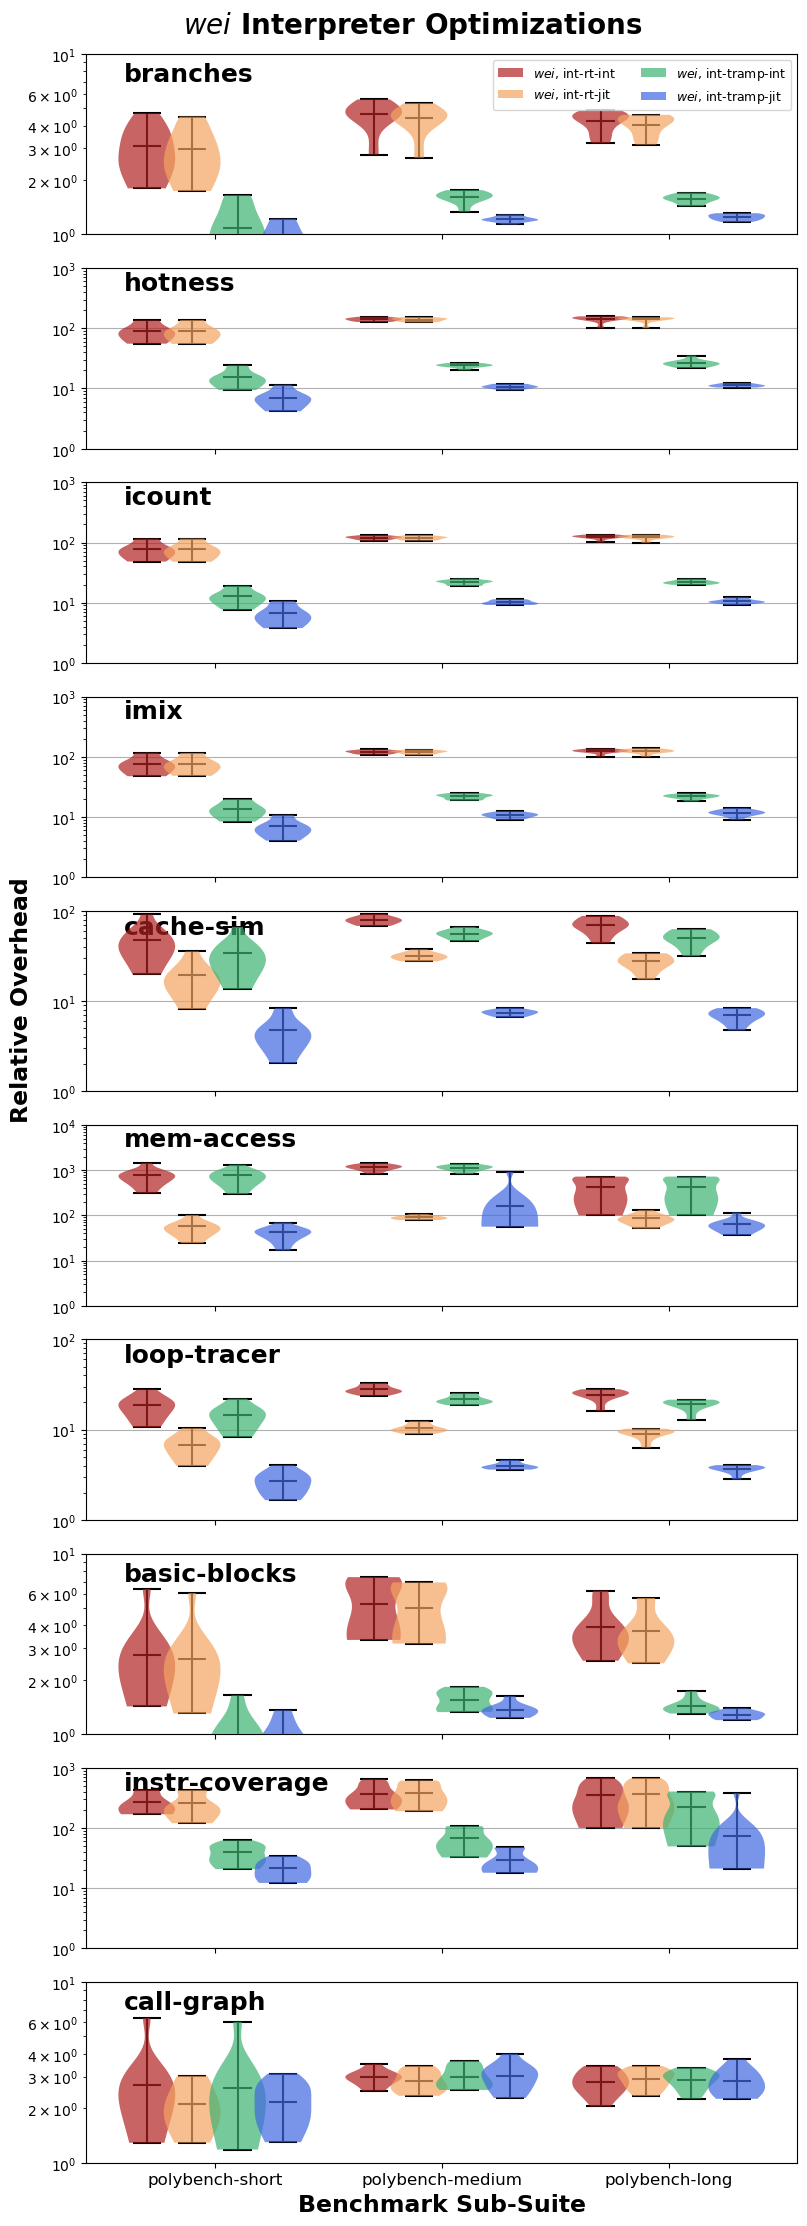

In [194]:
# branches_cfg = (branches_df, 30, 'branches', False)
# hotness_cfg = (hotness_df, 1300, 'hotness', False)
# imix_cfg = (imix_df, 1200, 'imix', False)
# cache_cfg = (cache_df, 900, 'cache-sim', True)
# cache_cfg = (cache_df, 900, 'cache-sim', True)

# plot_df([branches_cfg, hotness_cfg, imix_cfg, cache_cfg])


branches_df_thirds_cfg = (branches_df_thirds, 1e1, 'branches', False)
hotness_df_thirds_cfg = (hotness_df_thirds, 1e3, 'hotness', False)
icount_df_thirds_cfg = (icount_df_thirds, 1e3, 'icount', False)
imix_df_thirds_cfg = (imix_df_thirds, 1e3, 'imix', False)
cache_df_thirds_cfg = (cache_df_thirds, 1e2, 'cache-sim', False)
mem_access_df_thirds_cfg = (mem_access_df_thirds, 1e4, 'mem-access', False)
loop_tracer_df_thirds_cfg = (loop_tracer_df_thirds, 1e2, 'loop-tracer', False)
basic_blocks_df_thirds_cfg = (basic_blocks_df_thirds, 1e1, 'basic-blocks', False)
instr_coverage_df_thirds_cfg = (instr_coverage_df_thirds, 1e3, 'instr-coverage', False)
call_graph_df_thirds_cfg = (call_graph_df_thirds, 1e1, 'call-graph', True)
plot_df_grouped([branches_df_thirds_cfg, hotness_df_thirds_cfg, icount_df_thirds_cfg, imix_df_thirds_cfg,
                  cache_df_thirds_cfg,
                    mem_access_df_thirds_cfg, loop_tracer_df_thirds_cfg, basic_blocks_df_thirds_cfg, 
                    instr_coverage_df_thirds_cfg,
                      call_graph_df_thirds_cfg])

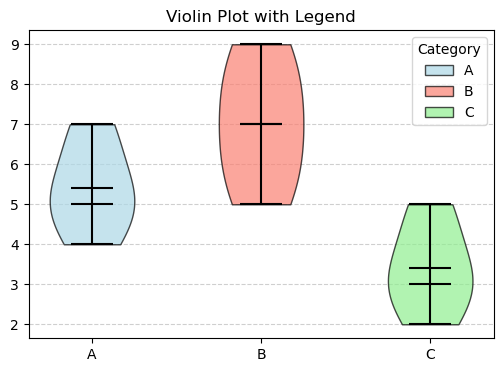

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.DataFrame({
    "A": [4, 5, 6, 7, 5],
    "B": [7, 8, 5, 6, 9],
    "C": [3, 4, 2, 3, 5]
})

fig, ax = plt.subplots(figsize=(6, 4))

colors = ["lightblue", "salmon", "lightgreen"]

parts = ax.violinplot([df[col] for col in df.columns],
                      positions=range(1, len(df.columns)+1),
                      showmeans=True, showmedians=True)

# Color each body and assign color
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor("black")
    pc.set_alpha(0.7)
    pc.set_zorder(3)

# Lines above
for key in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
    if key in parts:
        parts[key].set_color("black")
        parts[key].set_zorder(4)

# Grid behind
ax.yaxis.grid(True, linestyle="--", alpha=0.6, zorder=0)

# Axis labels
ax.set_xticks(range(1, len(df.columns)+1))
ax.set_xticklabels(df.columns)
ax.set_title("Violin Plot with Legend")

# --- Build legend manually ---
legend_handles = [Patch(facecolor=c, edgecolor="black", alpha=0.7, label=lab)
                  for c, lab in zip(colors, df.columns)]
ax.legend(handles=legend_handles, title="Category")

plt.show()
